**Proceso de limpieza del juego de datos**

In [2]:
# Cargamos los paquetes R que vamos a usar
library(ggplot2)
library(dplyr)

In [3]:
# Cargamos el juego de datos
datosAdult <- read.csv('adult.data', stringsAsFactors = FALSE, header = FALSE)

In [4]:
# Nombres de los atributos
names(datosAdult) <- c("age","workclass","fnlwgt","education",
     "educationNum","maritalStatus","occupation", "relationship","race","sex",
    "capitalGain","capitalLoss","hourPerWeek","nativeCountry","income")

In [5]:
# Verificamos la estructura del juego de datos
str(datosAdult)

'data.frame':	19163 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass    : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ educationNum : int  13 13 9 7 13 14 5 9 14 13 ...
 $ maritalStatus: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation   : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race         : chr  " White" " White" " White" " Black" ...
 $ sex          : chr  " Male" " Male" " Male" " Male" ...
 $ capitalGain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capitalLoss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hourPerWeek  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ nativeCountry: chr  " Unit

In [6]:
# Estadísticas de valores vacíos
colSums(is.na(datosAdult))

age     workclass        fnlwgt     education  educationNum 
            0             0             0             0             0 
maritalStatus    occupation  relationship          race           sex 
            0             0             0             0             0 
  capitalGain   capitalLoss   hourPerWeek nativeCountry        income 
            1             1             1             0             0

In [7]:
colSums(datosAdult=="")

age     workclass        fnlwgt     education  educationNum 
            0             0             0             0             0 
maritalStatus    occupation  relationship          race           sex 
            0             1             1             1             1 
  capitalGain   capitalLoss   hourPerWeek nativeCountry        income 
           NA            NA            NA             1             1

In [8]:
# Tomamos valor "United-States" para los valores vacíos de la variable "nativeCountry"
datosAdult$'nativeCountry'[datosAdult$'nativeCountry'==""]=" United-States"

# Tomamos la media para valores vacíos de la variable "hour-per-week"
datosAdult$'hourPerWeek'[is.na(datosAdult$'hourPerWeek')] <- mean(datosAdult$'hourPerWeek', na.rm=T)

# Tomamos valor "Female" para valor vacío de la variable "sex"
datosAdult$sex[datosAdult$sex==""]=" Female"

# Tomamos valor ">50K" para valor vacío de la variable "income"
datosAdult$income[datosAdult$income==""]=" >50K"

In [9]:
# Discretizamos cuando tiene sentido y en función de cada variable para ello comprobamos
# para qué variables tendría sentido un proceso de discretización

apply(datosAdult, 2, function(x) length(unique(x)))

age     workclass        fnlwgt     education  educationNum 
           71             9         14520            16            16 
maritalStatus    occupation  relationship          race           sex 
            8            16             7             6             2 
  capitalGain   capitalLoss   hourPerWeek nativeCountry        income 
          117            84            92            41             2

In [10]:
# Discretizamos las variables con pocas clases
cols<-c("race", "sex", "income")
for (i in cols){
  datosAdult[,i] <- as.factor(datosAdult[,i])
}

In [11]:
# Después de los cambios, analizamos la nueva estructura del juego de datos
str(datosAdult)

'data.frame':	19163 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass    : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ educationNum : int  13 13 9 7 13 14 5 9 14 13 ...
 $ maritalStatus: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation   : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race         : Factor w/ 6 levels ""," Amer-Indian-Eskimo",..: 6 6 6 4 4 6 4 6 6 6 ...
 $ sex          : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capitalGain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capitalLoss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hourPerWeek  : num  40 13 40 40 40 

**Proceso de análisis del juego de datos**

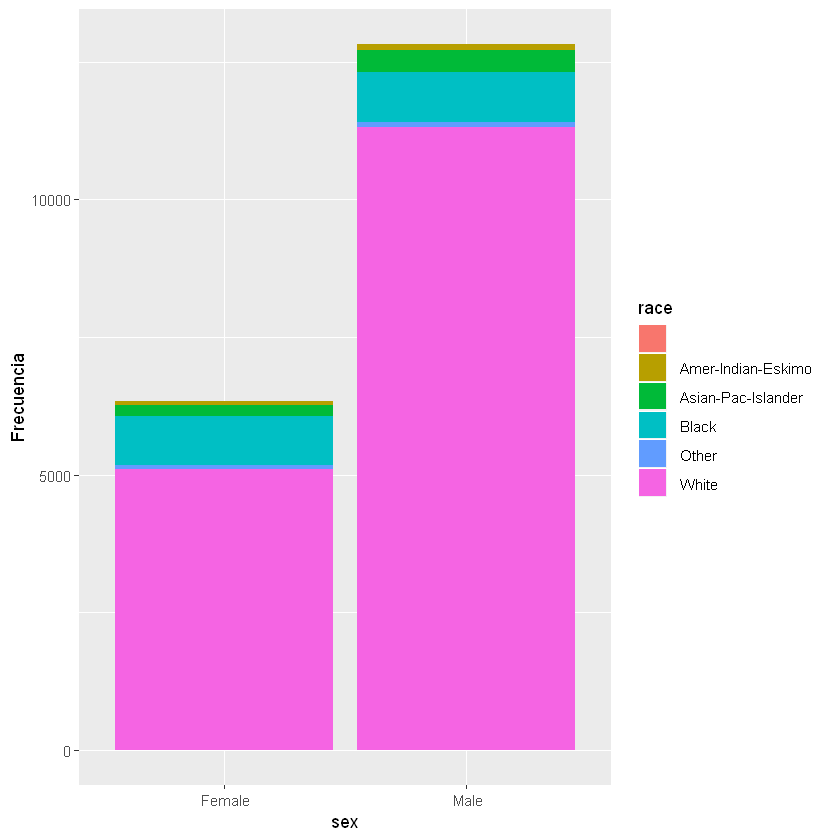

In [12]:
# Visualizamos la relación entre las variables "sex" y "race":
ggplot(data=datosAdult[],aes(x=sex,fill=race))+geom_bar()+ylab("Frecuencia")

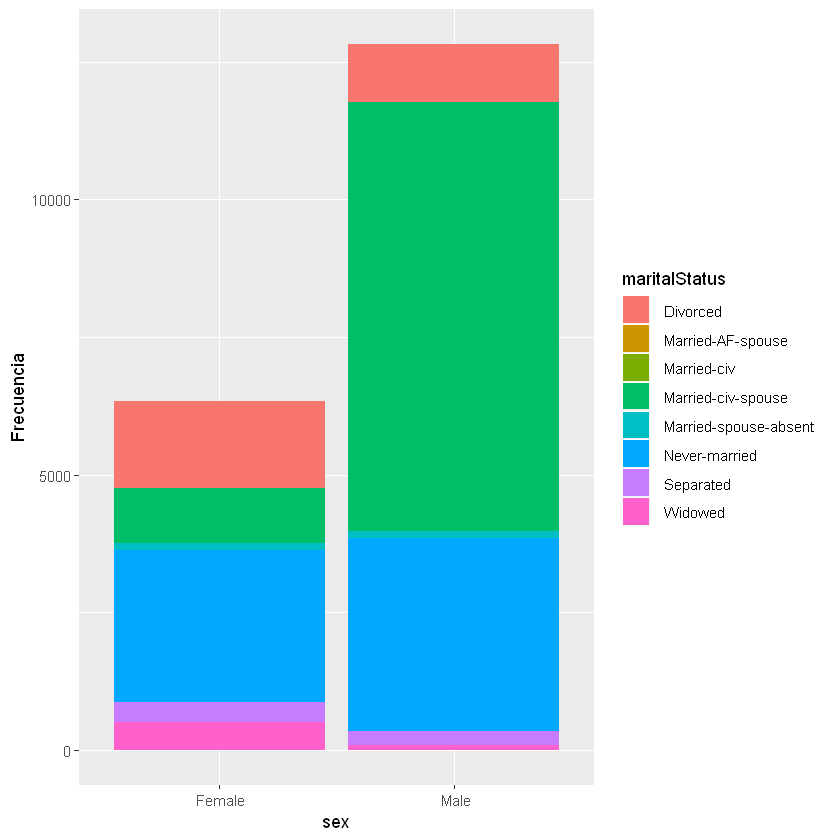

In [13]:
# Visualizamos la relación entre las variables "sex" y "maritalStatus":
ggplot(data=datosAdult[],aes(x=sex,fill=maritalStatus))+geom_bar()+geom_bar(position="fill")+ylab("Frecuencia")

In [14]:
# Matrices de porcentages de frecuencia. 
# Podemos ver que la probabilidad de estar divorciado siendo del sexo masculino es de 8.20 %

t<-table(datosAdult[]$sex,datosAdult[]$maritalStatus)
for (i in 1:dim(t)[1]){
    t[i,]<-t[i,]/sum(t[i,])*100
}
t

         
             Divorced  Married-AF-spouse  Married-civ  Married-civ-spouse
   Female 24.81452249         0.17363852   0.01578532         15.80110497
   Male    8.20081073         0.03118179   0.00000000         60.76551294
         
           Married-spouse-absent  Never-married   Separated     Widowed
   Female             1.78374112    43.77269140  5.65114444  7.98737174
   Male               1.02120362    27.40879326  1.86311194  0.70938572

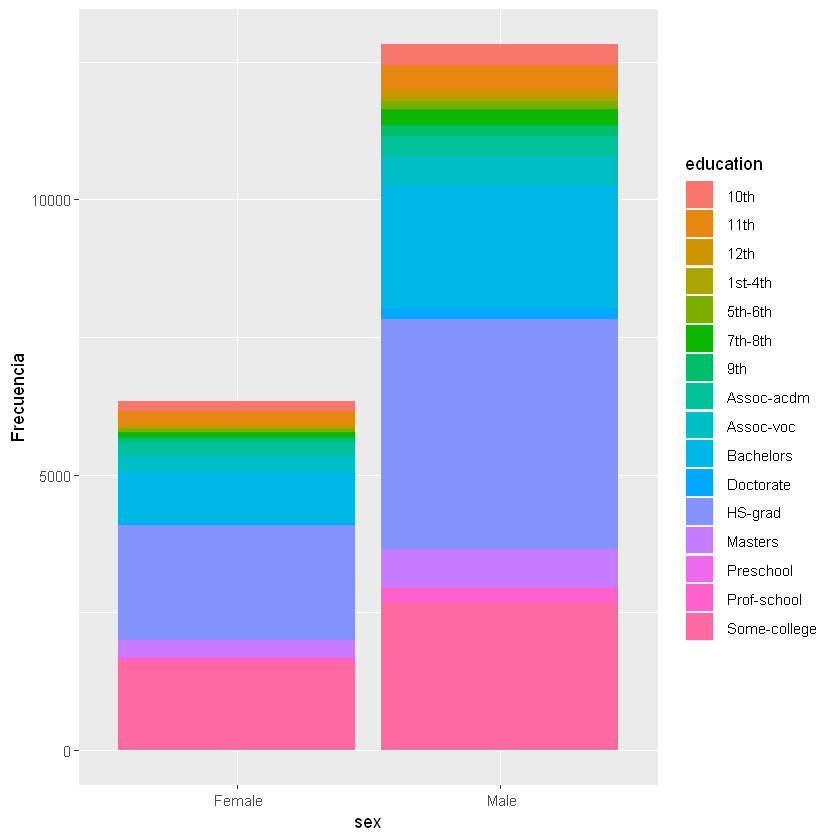

In [15]:
# Visualizamos la relación entre las variables "sex" y "education":
ggplot(data=datosAdult[],aes(x=sex,fill=education))+geom_bar()+geom_bar(position="fill")+ylab("Frecuencia")

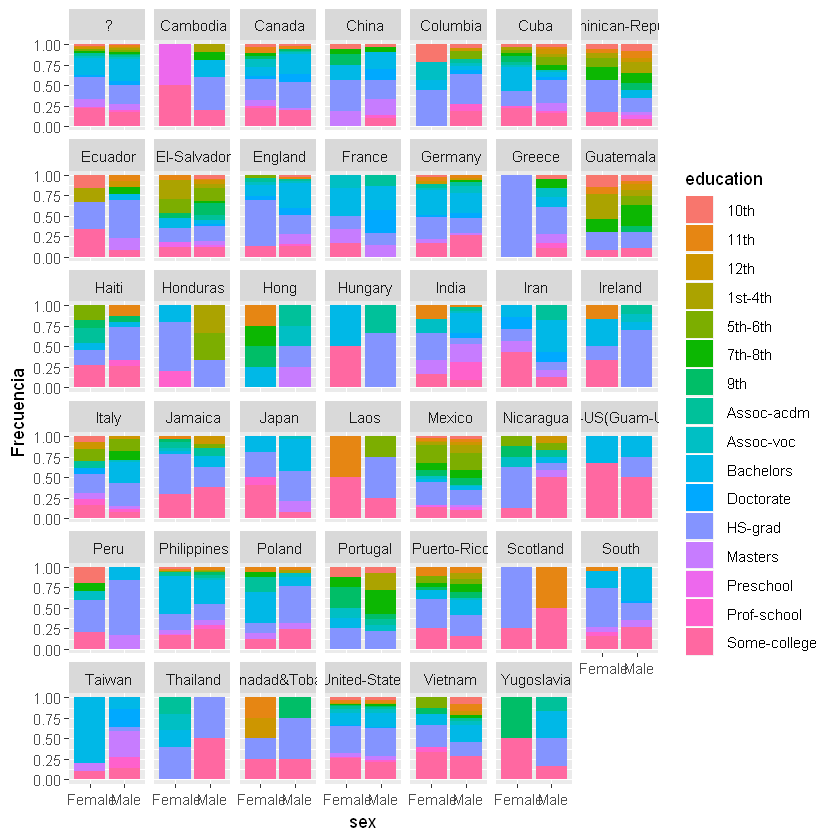

In [16]:
# Trabajando con 3 variables en un mismo gráfico de frecuencias. Agregaos la variable "nativeCountry"
ggplot(data = 
       datosAdult[],aes(x=sex,fill=education)
      )+geom_bar(position="fill")+facet_wrap(~nativeCountry)+ylab("Frecuencia")